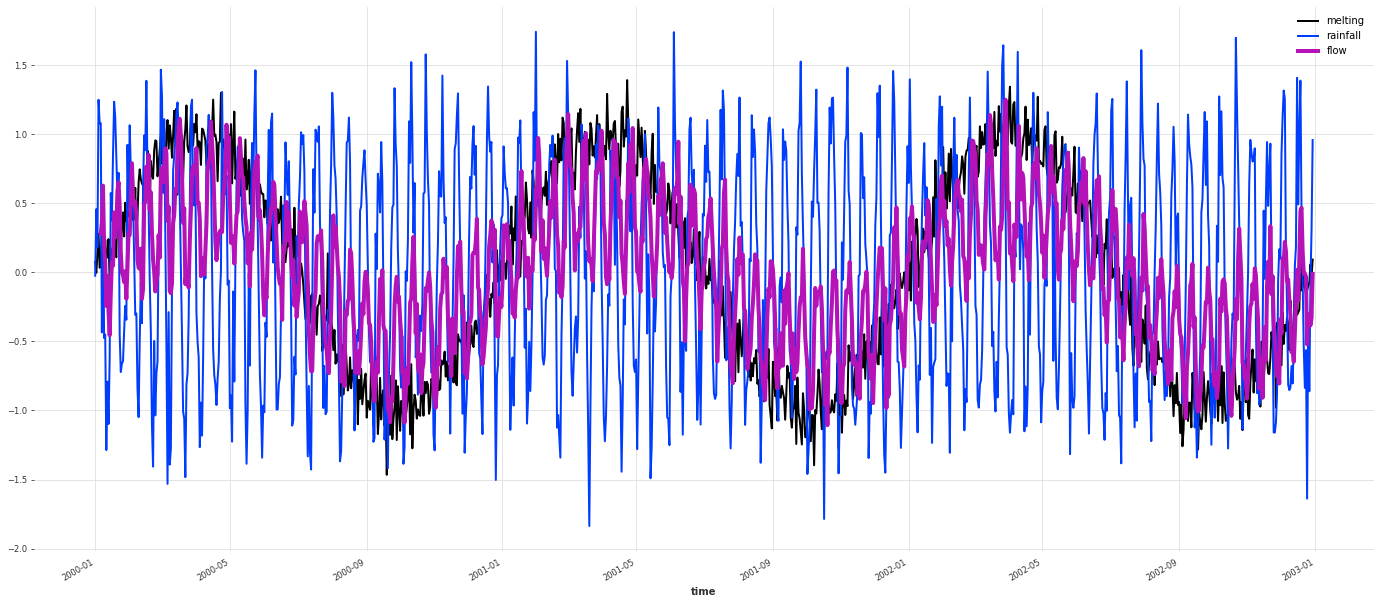

In [2]:
# First, some imports:
import numpy as np
from darts.utils import timeseries_generation as tg
import matplotlib.pyplot as plt

np.random.seed(42)

LENGTH = 3 * 365  # 3 years of daily data

# Melting: a sine with yearly periodicity and additive white noise
melting = (tg.sine_timeseries(length=LENGTH, 
                              value_frequency=(1/365), 
                              freq='D', 
                              column_name='melting')
           + 0.15 * tg.gaussian_timeseries(length=LENGTH, freq='D'))

# Rainfalls: a sine with bi-weekly periodicity and additive white noise
rainfalls = (tg.sine_timeseries(length=LENGTH, 
                                value_frequency=(1/14), 
                                freq='D', 
                                column_name='rainfall')
             + 0.3 * tg.gaussian_timeseries(length=LENGTH, freq='D'))

# We scale and shift the melting by 5 days; giving us the melting contribution
melting_contribution = 0.5 * melting.shift(5)

# We compute similar contribution from the rainfalls
all_contributions = [melting_contribution] + [0.1 * rainfalls.shift(lag) for lag in range(5)]

# We compute the final flow as the sum of everything,
# trimming series so they all have the same start time
flow = sum([series[melting_contribution.start_time():][:melting.end_time()]
            for series in all_contributions]).with_columns_renamed('melting', 'flow')

# add some white noise
flow += 0.1 * tg.gaussian_timeseries(length=len(flow))

plt.figure(100, figsize=(24, 10))

melting.plot()
rainfalls.plot()
flow.plot(lw=4)

# Cuántos períodos de prueba usaremos
ntest=100

[2021-11-09 11:53:06,789] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 951 samples.
[2021-11-09 11:53:06,789] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 951 samples.
[2021-11-09 11:53:06,795] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-11-09 11:53:06,795] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.


  0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Red Neuronal Recursiva Estocástica')

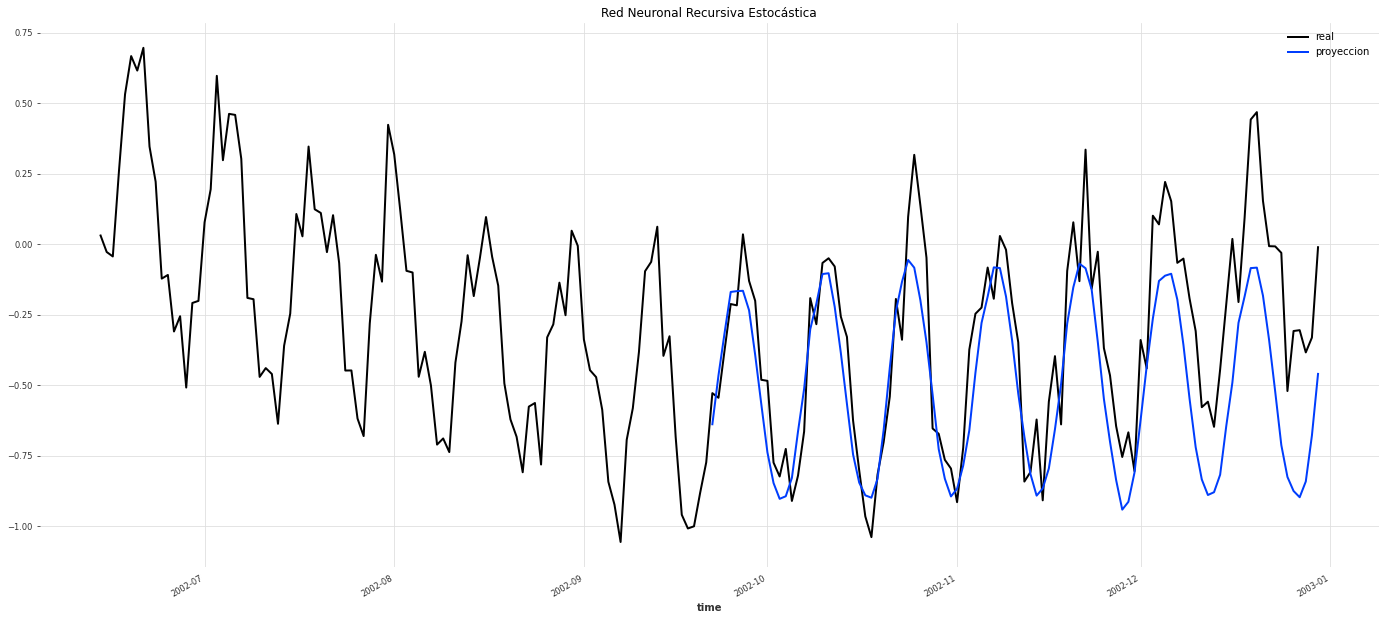

In [3]:
# Sin exógenas
from darts.models import BlockRNNModel

brnn_no_cov = BlockRNNModel(input_chunk_length=30, 
                            output_chunk_length=10, 
                            n_rnn_layers=2)

brnn_no_cov.fit(flow[:-1*ntest], 
                epochs=100, 
                verbose=True)

# Visualizar resultados
forecast = brnn_no_cov.predict(ntest)
plt.figure(figsize=(24, 10))
flow[-2*ntest:].plot(label='real')
forecast.plot(label='proyeccion')
plt.title("Red Neuronal Recursiva Estocástica")

Text(0.5, 1.0, 'Regresion Lineal Multivariada Con Pasados Y Futuros')

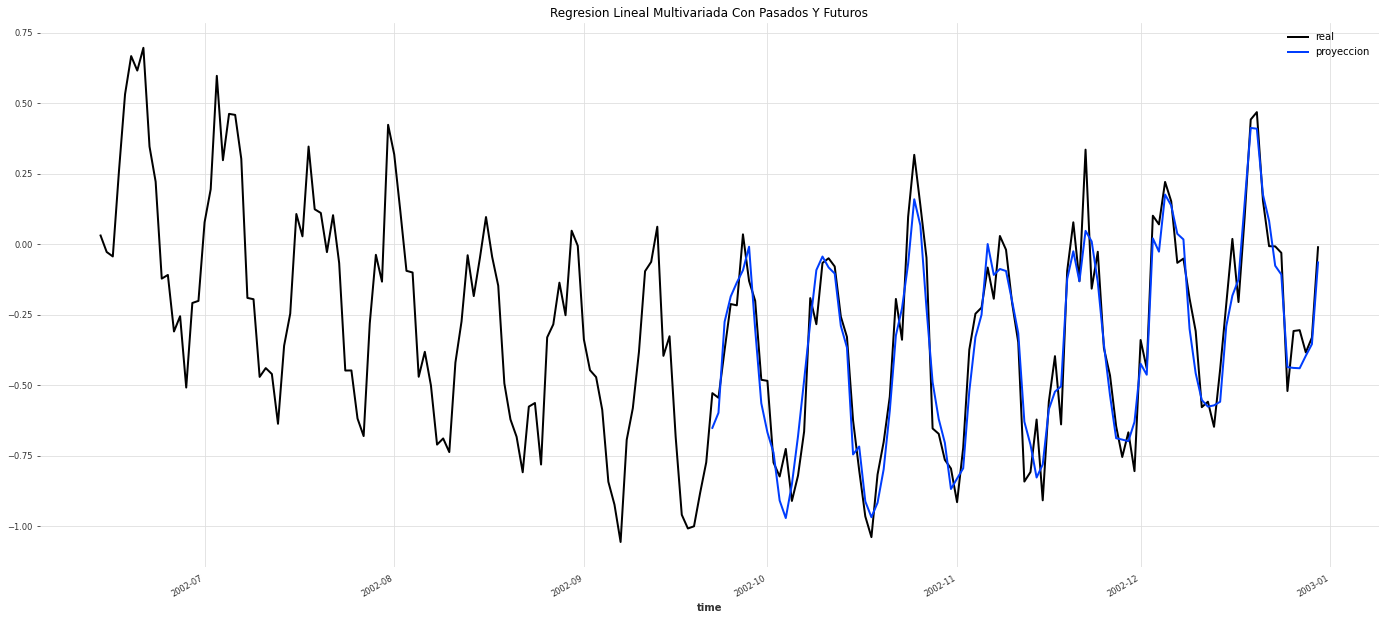

In [4]:
from darts.models import RegressionModel

regr_model = RegressionModel(lags=None,
                             lags_past_covariates=[-5, -4, -3, -2, -1], 
                             lags_future_covariates=[-4, -3, -2, -1, 0])

regr_model.fit(flow[:-1*ntest],
               past_covariates=melting,
               future_covariates=rainfalls)

# Visualizar resultados
forecast = regr_model.predict(ntest)
plt.figure(figsize=(24, 10))
flow[-2*ntest:].plot(label='real')
forecast.plot(label='proyeccion')
plt.title("Regresion Lineal Multivariada Con Pasados Y Futuros")


Text(0.5, 1.0, 'Regresion Lineal Multivariada Solo Con Pasados')

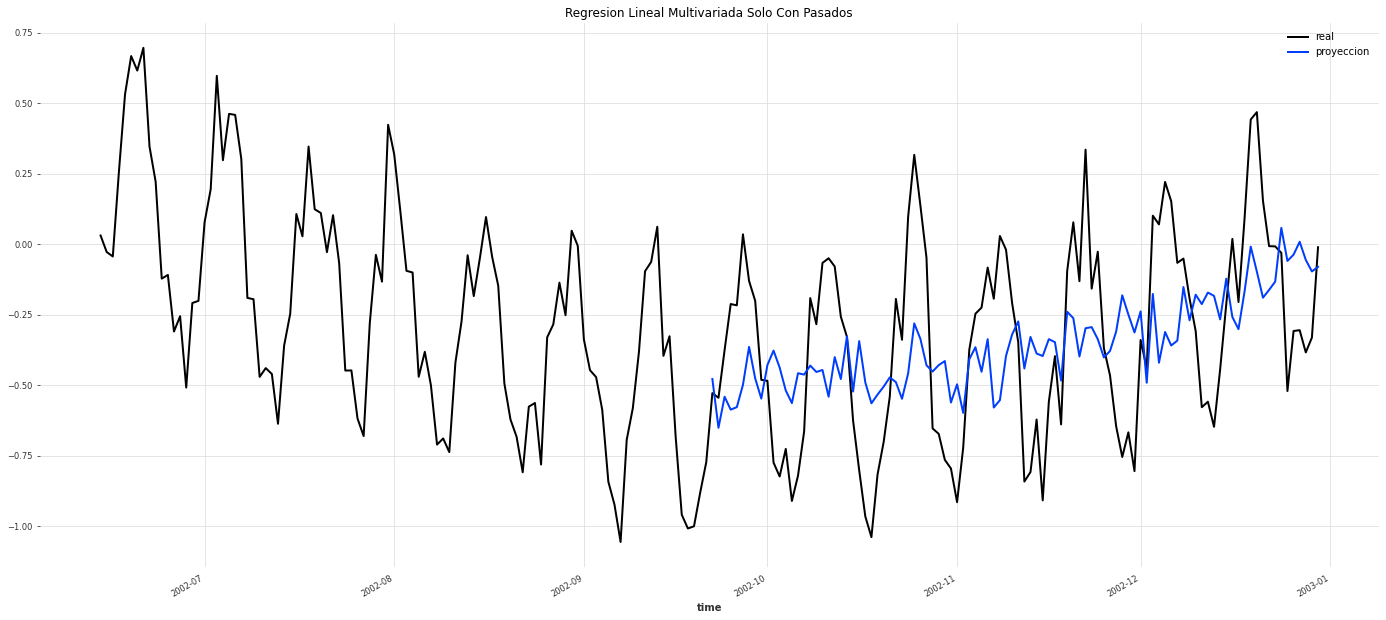

In [5]:
from darts.models import RegressionModel

regr_model = RegressionModel(lags=None,
                             lags_past_covariates=[-5, -4, -3, -2, -1])

regr_model.fit(flow[:-1*ntest],
               past_covariates=melting)

# Visualizar resultados
forecast = regr_model.predict(ntest)
plt.figure(figsize=(24, 10))
flow[-2*ntest:].plot(label='real')
forecast.plot(label='proyeccion')
plt.title("Regresion Lineal Multivariada Solo Con Pasados")

In [1]:
# RRN con pasado de exógenas
from darts.models import BlockRNNModel


brnn_no_cov = BlockRNNModel(input_chunk_length=30, 
                            output_chunk_length=10, 
                            n_rnn_layers=20)

brnn_no_cov.fit(flow[:-1*ntest],
               past_covariates=melting,
                epochs=100, 
                verbose=True)

# Visualizar resultados
forecast = brnn_no_cov.predict(ntest)
plt.figure(figsize=(24, 10))
flow[-2*ntest:].plot(label='real')
forecast.plot(label='proyeccion')
plt.title("Red Neuronal Recursiva Con Exógenas Solo Con Pasados")

NameError: name 'flow' is not defined

In [ ]:
# RRN con pasado de exógenas
from darts.models import BlockRNNModel


brnn_no_cov = BlockRNNModel(input_chunk_length=300, 
                            output_chunk_length=100, 
                            n_rnn_layers=2,)

brnn_no_cov.fit(flow[:-1*ntest],
               past_covariates=melting[:-1*ntest],
                epochs=100, 
                verbose=True)

# Visualizar resultados
forecast = brnn_no_cov.predict(ntest)
plt.figure(figsize=(24, 10))
flow[-3*ntest:].plot(label='real')
forecast.plot(label='proyeccion')
plt.title("Red Neuronal Recursiva Con Exógenas Solo Con Pasados")

In [ ]:

# Visualizar resultados
forecast = brnn_no_cov.predict(100)
plt.figure(figsize=(24, 10))
flow[-3*ntest:].plot(label='real')
forecast.plot(label='proyeccion')
plt.title("Red Neuronal Recursiva Con Exógenas Solo Con Pasados")

In [ ]:
melting[:-1*ntest]

In [ ]:
flow[:-1*ntest]